In [14]:
import torch
import torch.optim as optim


In [15]:
def density(x,alpha,beta):
    return x**(alpha-1) * (1-x)**(beta-1)

In [16]:
negetive_log_likelihood = lambda x,alpha,beta: -torch.log(density(x,alpha,beta))
alpha = torch.tensor(2.0,requires_grad=True)
beta = torch.tensor(4.0,requires_grad=True)
initial_guess = torch.tensor([0.5], requires_grad=True, dtype=torch.float64)
optimizer = torch.optim.Adam([initial_guess], lr=0.01)
num_steps = 1000
for step in range(num_steps):
    optimizer.zero_grad()  
    loss = negetive_log_likelihood(initial_guess, alpha, beta)
    loss.backward()  
    optimizer.step() 

mode = initial_guess.item()

print(f"Mode: {mode}")

Mode: 0.25


In [17]:
log_negetive_log_likelihood_second_derivative = -(alpha - 1) / mode**2 - (beta - 1) / (1 - mode)**2
variance = 1 / log_negetive_log_likelihood_second_derivative
variance = variance.detach().numpy()
print(f"Variance: {variance}")


Variance: -0.046875


/tmp/ipykernel_2598420/3666665601.py:6: RuntimeWarning: invalid value encountered in sqrt
  1 / np.sqrt(2 * np.pi * variance) * np.exp(-0.5 * ((x_values - mode) / np.sqrt(variance))**2)


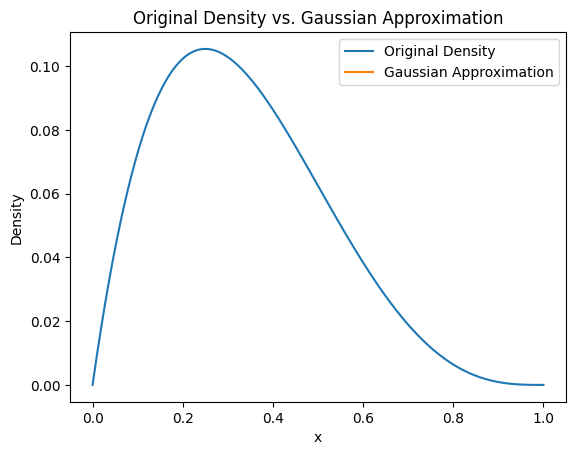

In [18]:
import numpy as np
x_values = np.linspace(0, 1, 1000)
from matplotlib import pyplot as plt

gaussian_approximation = (
   1 / np.sqrt(2 * np.pi * variance) * np.exp(-0.5 * ((x_values - mode) / np.sqrt(variance))**2)
)

# Plot the original density and the Gaussian approximation
plt.plot(x_values, density(x_values, alpha.item(), beta.item()), label="Original Density")
plt.plot(x_values, gaussian_approximation, label="Gaussian Approximation")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Original Density vs. Gaussian Approximation");


In [19]:

import ipywidgets as widgets
from ipywidgets import interact

def density(x, alpha, beta):
    return x**(alpha - 1) * (1 - x)**(beta - 1)

def gaussian_approximation(alpha, beta):
    mode = (1 - alpha) / (2 - alpha - beta)
    log_density_second_derivative = -((alpha - 1) / mode**2 + (beta - 1) / (1 - mode)**2)
    variance = 1 / log_density_second_derivative
    mean = mode
    
    x_values = np.linspace(0, 1, 1000)
    gaussian = (
        1 / np.sqrt(2 * np.pi * variance) * np.exp(-0.5 * ((x_values - mean) / np.sqrt(variance))**2)
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, density(x_values, alpha, beta), label="Original Density")
    plt.plot(x_values, gaussian, label="Gaussian Approximation")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Original Density vs. Gaussian Approximation")
    plt.show()

alpha_slider = widgets.FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description="Alpha:")
beta_slider = widgets.FloatSlider(value=3.0, min=0.1, max=10.0, step=0.1, description="Beta:")

interact(gaussian_approximation, alpha=alpha_slider, beta=beta_slider)
